In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.model_selection import StratifiedKFold
import category_encoders

In [2]:
train_public = pd.read_csv('./train_dataset/train_public.csv')
test_public = pd.read_csv('./test_public.csv')
train_internet = pd.read_csv('./train_dataset/train_internet.csv')

In [3]:
train_public.shape

(10000, 39)

In [4]:
X_train = train_public.copy()
X_test = test_public.copy()

In [5]:
X_train = X_train.drop(['isDefault'], axis = 1)
X_train.shape

(10000, 38)

In [6]:
X_train['is_train'] = 1
X_test['is_train'] = 0

X_traintest = X_traintest = pd.concat([X_train, X_test], axis = 0)
X_traintest.shape

(15000, 39)

### 数据探索 

In [7]:
X_traintest.head(39)

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,...,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,is_train
0,1040418,240418,31818.181820,3,11.466,1174.91,C,政府机构,金融业,3 years,...,1,1.0,0.0,4.0,5.0,4.0,3,9927,0.0,1
1,1025197,225197,28000.000000,5,16.841,670.69,C,政府机构,金融业,10+ years,...,1,7.0,0.0,4.0,45.0,22.0,0,0,0.0,1
2,1009360,209360,17272.727270,3,8.900,603.32,A,政府机构,公共服务、社会组织,10+ years,...,1,6.0,0.0,6.0,28.0,19.0,0,0,0.0,1
3,1039708,239708,20000.000000,3,4.788,602.30,A,世界五百强,文化和体育业,6 years,...,1,5.0,0.0,10.0,15.0,9.0,0,0,0.0,1
4,1027483,227483,15272.727270,3,12.790,470.31,C,政府机构,信息传输、软件和信息技术服务业,< 1 year,...,1,10.0,0.0,6.0,15.0,4.0,0,0,0.0,1
5,1047529,247529,25454.545450,3,10.637,899.15,B,幼教与中小学校,信息传输、软件和信息技术服务业,10+ years,...,1,6.0,0.0,6.0,20.0,15.0,0,0,0.0,1
6,1030964,230964,9090.909091,5,15.741,234.30,C,高等教育机构,金融业,10+ years,...,1,4.0,0.0,9.0,25.0,6.0,0,0,0.0,1
7,1024822,224822,10288.636360,3,11.490,414.62,B,普通企业,制造业,2 years,...,1,4.0,0.0,0.0,9.0,9.0,0,0,0.0,1
8,1008720,208720,6818.181818,3,20.064,272.05,D,普通企业,金融业,NaN,...,1,6.0,0.0,2.0,34.0,22.0,0,0,0.0,1
9,1045305,245305,10800.000000,3,14.330,339.95,C,幼教与中小学校,住宿和餐饮业,4 years,...,1,3.0,0.0,15.0,6.0,6.0,0,0,0.0,1


In [8]:
X_traintest.columns

Index(['loan_id', 'user_id', 'total_loan', 'year_of_loan', 'interest',
       'monthly_payment', 'class', 'employer_type', 'industry', 'work_year',
       'house_exist', 'censor_status', 'issue_date', 'use', 'post_code',
       'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low',
       'scoring_high', 'known_outstanding_loan', 'known_dero',
       'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status',
       'app_type', 'earlies_credit_mon', 'title', 'policy_code', 'f0', 'f1',
       'f2', 'f3', 'f4', 'early_return', 'early_return_amount',
       'early_return_amount_3mon', 'is_train'],
      dtype='object')

In [9]:
X_traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 4999
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   15000 non-null  int64  
 1   user_id                   15000 non-null  int64  
 2   total_loan                15000 non-null  float64
 3   year_of_loan              15000 non-null  int64  
 4   interest                  15000 non-null  float64
 5   monthly_payment           15000 non-null  float64
 6   class                     15000 non-null  object 
 7   employer_type             15000 non-null  object 
 8   industry                  15000 non-null  object 
 9   work_year                 14100 non-null  object 
 10  house_exist               15000 non-null  int64  
 11  censor_status             15000 non-null  int64  
 12  issue_date                15000 non-null  object 
 13  use                       15000 non-null  int64  
 14  post_co

In [10]:
print(f'There are {X_traintest.isnull().any().sum()} columns in train dataset with missing values.')

There are 7 columns in train dataset with missing values.


In [11]:
have_null_fea_dict = (X_traintest.isnull().sum()/len(X_traintest)).to_dict() 
fea_null_moreThanThreshold = {} 
for key,value in have_null_fea_dict.items(): 
    if value > 0.4: 
        fea_null_moreThanThreshold[key] = value
fea_null_moreThanThreshold

{}

<AxesSubplot:>

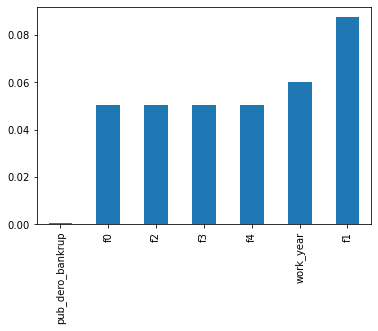

In [12]:
missing = X_traintest.isnull().sum()/len(X_traintest) 
missing = missing[missing > 0] 
missing.sort_values(inplace=True) 
missing.plot.bar()

In [13]:
one_value_fea = [col for col in X_traintest.columns if X_traintest[col].nunique() <= 1]
print(one_value_fea)
print(f'There are {len(one_value_fea)} columns in train dataset with one unique value.') 

['policy_code']
There are 1 columns in train dataset with one unique value.


In [14]:
# X_traintest = X_traintest.drop('loan_id', axis=1)

# X_traintest = X_traintest.drop('user_id', axis=1)

X_traintest = X_traintest.drop(one_value_fea, axis=1)

In [15]:
numerical_fea = list(X_traintest.select_dtypes(exclude=['object']).columns) 
category_fea = list(filter(lambda x: x not in numerical_fea,list(X_traintest.columns)))
print("numerical_fea:",numerical_fea)
print("category_fea:",category_fea)

numerical_fea: ['loan_id', 'user_id', 'total_loan', 'year_of_loan', 'interest', 'monthly_payment', 'house_exist', 'censor_status', 'use', 'post_code', 'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low', 'scoring_high', 'known_outstanding_loan', 'known_dero', 'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status', 'app_type', 'title', 'f0', 'f1', 'f2', 'f3', 'f4', 'early_return', 'early_return_amount', 'early_return_amount_3mon', 'is_train']
category_fea: ['class', 'employer_type', 'industry', 'work_year', 'issue_date', 'earlies_credit_mon']


In [16]:
def get_numerical_serial_fea(data,feas): 
    numerical_serial_fea = [] 
    numerical_noserial_fea = [] 
    for fea in feas: 
        temp = data[fea].nunique() 
        if temp <= 10: 
            numerical_noserial_fea.append(fea) 
            continue 
        numerical_serial_fea.append(fea) 
    return numerical_serial_fea,numerical_noserial_fea 
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(X_traintest,numerical_fea)
print("numerical_fea中的numerical_serial_fea:",numerical_serial_fea)
print("numerical_fea中的numerical_noserial_fea:",numerical_noserial_fea)

numerical_fea中的numerical_serial_fea: ['loan_id', 'user_id', 'total_loan', 'interest', 'monthly_payment', 'use', 'post_code', 'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low', 'scoring_high', 'known_outstanding_loan', 'known_dero', 'recircle_b', 'recircle_u', 'title', 'f0', 'f2', 'f3', 'f4', 'early_return_amount', 'early_return_amount_3mon']
numerical_fea中的numerical_noserial_fea: ['year_of_loan', 'house_exist', 'censor_status', 'pub_dero_bankrup', 'initial_list_status', 'app_type', 'f1', 'early_return', 'is_train']


### 特征工程 

#### work_year, class 

In [17]:
work_year_dict = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}

# train_data['work_year'] = train_data['work_year'].map(work_year_dict)
# test_public['work_year'] = test_public['work_year'].map(work_year_dict)
# train_data['work_year'] = train_data['work_year'].fillna(-1)
# test_public['work_year'] = test_public['work_year'].fillna(-1)
# train_internet['work_year'] = train_internet['work_year'].map(work_year_dict)
# train_internet['work_year'] = train_internet['work_year'].fillna(-1)

X_traintest['num_work_year'] = X_traintest['work_year'].map(work_year_dict)

In [18]:
class_dict = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
}

# train_data['class'] = train_data['class'].map(class_dict)
# test_public['class'] = test_public['class'].map(class_dict)
# train_internet['class'] = train_internet['class'].map(class_dict)

X_traintest['num_class'] = X_traintest['class'].map(class_dict)

#### issue_date, earlies_credit_mon

In [19]:
# train_data['issue_date'] = pd.to_datetime(train_data['issue_date'])
# test_public['issue_date'] = pd.to_datetime(test_public['issue_date'])
# train_internet['issue_date'] = pd.to_datetime(train_internet['issue_date'])

# train_data['issue_date_month'] = train_data['issue_date'].dt.month
# test_public['issue_date_month'] = train_data['issue_date'].dt.month
# train_internet['issue_date_month'] = train_internet['issue_date'].dt.month

# train_data['issue_date_dayofweek'] = train_data['issue_date'].dt.dayofweek
# test_public['issue_date_dayofweek'] = train_data['issue_date'].dt.dayofweek
# train_internet['issue_date_dayofweek'] = train_internet['issue_date'].dt.dayofweek

X_traintest['issue_date'] = pd.to_datetime(X_traintest['issue_date'])

X_traintest['issue_date_month'] = X_traintest['issue_date'].dt.month

X_traintest['issue_date_dayofweek'] = X_traintest['issue_date'].dt.dayofweek

X_traintest['issue_date_delta'] = (X_traintest['issue_date'] - X_traintest['issue_date'].min())  / np.timedelta64(1,'D')

In [20]:
X_traintest['earlies_credit_mon'] = pd.to_datetime(X_traintest['earlies_credit_mon'])

X_traintest['earlies_credit_mon_delta'] = (X_traintest['earlies_credit_mon'] - X_traintest['earlies_credit_mon'].min())  / np.timedelta64(1,'D')

In [21]:
X_traintest['earlies_credit_Mon'] = X_traintest['earlies_credit_mon'].dt.month

X_traintest['earlies_credit_Year'] = X_traintest['earlies_credit_mon'].dt.year

X_traintest['earlies_credit_dayofweek'] = X_traintest['earlies_credit_mon'].dt.dayofweek

In [22]:
X_traintest['earlies_credit_Mon']

0       12
1        4
2       10
3        6
4        5
        ..
4995     7
4996     4
4997    10
4998     3
4999     7
Name: earlies_credit_Mon, Length: 15000, dtype: int64

#### employer_type, industry

In [23]:
from sklearn.preprocessing import LabelEncoder


lbl1 = LabelEncoder().fit(X_traintest['employer_type'])
X_traintest['num_employer_type'] = lbl1.transform(X_traintest['employer_type'])

lbl2 = LabelEncoder().fit(X_traintest['industry'])
X_traintest['num_industry'] = lbl2.transform(X_traintest['industry'])


In [24]:
X_traintest['num_industry']

0       13
1       13
2        3
3       10
4        2
        ..
4995     2
4996     8
4997     8
4998    10
4999     0
Name: num_industry, Length: 15000, dtype: int32

#### Counts 

In [25]:
X_traintest['house_exist'] 

0       0
1       0
2       1
3       0
4       2
       ..
4995    1
4996    1
4997    0
4998    0
4999    1
Name: house_exist, Length: 15000, dtype: int64

In [26]:
features = X_traintest.columns

In [27]:
for cat in features:
    X_traintest[cat+'_cnt'] = category_encoders.count.CountEncoder().fit_transform(X_traintest[cat])

In [28]:
one_value_fea = [col for col in X_traintest.columns if X_traintest[col].nunique() <= 1]
print(one_value_fea)
print(f'There are {len(one_value_fea)} columns in train dataset with one unique value.') 

[]
There are 0 columns in train dataset with one unique value.


In [29]:
train_data = X_traintest[X_traintest.is_train == 1][X_traintest.columns]

test_data = X_traintest[X_traintest.is_train == 0][X_traintest.columns]

#### Internet表补充 

In [30]:
tr_cols = set(train_data.columns)
same_col = list(tr_cols.intersection(set(train_internet.columns)))
train_inteSame = train_internet[same_col].copy()

Inte_add_cos = list(tr_cols.difference(set(same_col)))
for col in Inte_add_cos:
    train_inteSame[col] = np.nan

In [31]:
drop_fea = ['employer_type', 'industry', 'work_year', 'issue_date', 'earlies_credit_mon', 'class', 'issue_date_cnt', 'earlies_credit_mon_cnt']

for cat in drop_fea:
    train_data = train_data.drop(cat, axis = 1)
    train_inteSame = train_inteSame.drop(cat, axis = 1)

In [32]:
train_inteSame['censor_status'].astype(int)

0         2
1         2
2         1
3         2
4         0
         ..
749995    1
749996    2
749997    2
749998    2
749999    1
Name: censor_status, Length: 750000, dtype: int32

### 模型 

In [33]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import catboost

In [34]:
from sklearn.model_selection import ShuffleSplit

def train_model(data_, test_, y_, folds_):
    oof_preds = np.zeros(data_.shape[0])
    sub_preds = np.zeros(test_.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in data_.columns if f not in ['loan_id', 'user_id', 'isDefault'] ]
    for n_fold, (trn_idx, val_idx) in enumerate(folds_.split(data_)):
        trn_x, trn_y = data_[feats].iloc[trn_idx], y_.iloc[trn_idx]
        val_x, val_y = data_[feats].iloc[val_idx], y_.iloc[val_idx]
        clf = LGBMClassifier(
            n_estimators=4000,
            learning_rate=0.08,
            num_leaves=2**5,
            colsample_bytree=.65,
            subsample=.9,
            max_depth=5,
#             max_bin=250,
            reg_alpha=.3,
            reg_lambda=.3,
            min_split_gain=.01,
            min_child_weight=2,
            silent=-1,
            verbose=-1,
        )
        
        clf.fit(trn_x, trn_y, 
                eval_set= [(trn_x, trn_y), (val_x, val_y)], 
                eval_metric='auc', verbose=100, early_stopping_rounds=50  #30
               )

        oof_preds[val_idx] = clf.predict_proba(val_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_[feats], num_iteration=clf.best_iteration_)[:, 1] / folds_.n_splits
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
        del clf, trn_x, trn_y, val_x, val_y
        gc.collect()
        
    print('Full AUC score %.6f' % roc_auc_score(y_, oof_preds)) 
    
    test_['isDefault'] = sub_preds

    return oof_preds, test_[['loan_id', 'isDefault']], feature_importance_df
    
def display_importances(feature_importance_df_):
    # Plot feature importances
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(
        by="importance", ascending=False)[:50].index
    
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    
    plt.figure(figsize=(8,10))
    sns.barplot(x="importance", y="feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances.png')

In [35]:
train_label = train_public['isDefault']
folds = KFold(n_splits=5, shuffle=True, random_state=546789)

In [36]:
oof_preds, IntePre, importances = train_model(train_data, train_inteSame, train_label, folds)

Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.96263	training's binary_logloss: 0.212074	valid_1's auc: 0.892039	valid_1's binary_logloss: 0.291753
Early stopping, best iteration is:
[50]	training's auc: 0.935396	training's binary_logloss: 0.248354	valid_1's auc: 0.895095	valid_1's binary_logloss: 0.289034
Fold  1 AUC : 0.895095
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[42]	training's auc: 0.928798	training's binary_logloss: 0.259454	valid_1's auc: 0.895754	valid_1's binary_logloss: 0.284796
Fold  2 AUC : 0.895754
Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.96532	training's binary_logloss: 0.207115	valid_1's auc: 0.87525	valid_1's binary_logloss: 0.311453
Early stopping, best iteration is:
[76]	training's auc: 0.953979	training's binary_logloss: 0.222697	valid_1's auc: 0.877305	valid_1's binary_logloss: 0.309563
Fold  3 AUC : 0.877305
Training until vali

In [37]:
IntePre['isDef'] = train_internet['is_default']

E:\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(IntePre['isDef'],IntePre.isDefault)

0.6622453132897744

In [39]:
InteId = IntePre.loc[IntePre.isDefault<0.05, 'loan_id'].tolist()

train_data['dataSourse'] = 1
test_data['dataSourse'] = 1
train_inteSame['dataSourse'] = 0
train_inteSame['isDefault'] = train_internet['is_default']
use_te = train_inteSame[train_inteSame.loan_id.isin( InteId )].copy()
data = pd.concat([ train_data,test_data,use_te]).reset_index(drop=True)


In [40]:
train = data[data['isDefault'].notna()]
test  = data[data['isDefault'].isna()]
# for col in ['sub_class', 'work_type']:
#     del train[col]
#     del test[col]


del data
del train_data,test_data

for cat in drop_fea:
    train = train.drop(cat, axis=1)
    test = test.drop(cat, axis=1)

y = train['isDefault']
folds = KFold(n_splits=5, shuffle=True, random_state=546789)
oof_preds, test_preds, importances = train_model(train, test, y, folds)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	training's auc: 1	training's binary_logloss: 0	valid_1's auc: 1	valid_1's binary_logloss: 0


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [41]:
test

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,house_exist,censor_status,use,post_code,...,issue_date_dayofweek_cnt,issue_date_delta_cnt,earlies_credit_mon_delta_cnt,earlies_credit_Mon_cnt,earlies_credit_Year_cnt,earlies_credit_dayofweek_cnt,num_employer_type_cnt,num_industry_cnt,dataSourse,isDefault
0,1040418,240418,31818.181820,3,11.466,1174.91,0,1,2,193.0,...,5.0,3349.0,25385.0,12.0,2021.0,2.0,3.0,13.0,1,NaN
1,1025197,225197,28000.000000,5,16.841,670.69,0,2,0,491.0,...,5.0,2131.0,13818.0,4.0,1990.0,6.0,3.0,13.0,1,NaN
2,1009360,209360,17272.727270,3,8.900,603.32,1,0,4,459.0,...,2.0,2345.0,14366.0,10.0,1991.0,1.0,3.0,3.0,1,NaN
3,1039708,239708,20000.000000,3,4.788,602.30,0,1,0,157.0,...,2.0,2891.0,25202.0,6.0,2021.0,1.0,1.0,10.0,1,NaN
4,1027483,227483,15272.727270,3,12.790,470.31,2,1,0,38.0,...,4.0,3257.0,25172.0,5.0,2021.0,6.0,3.0,2.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1008856,208856,9454.545455,5,12.015,183.47,1,0,0,48.0,...,5.0,1249.0,25236.0,7.0,2021.0,0.0,3.0,2.0,1,NaN
14996,1016651,216651,5500.000000,3,7.970,172.28,1,0,0,31.0,...,0.0,3561.0,25152.0,4.0,2021.0,0.0,3.0,8.0,1,NaN
14997,1024140,224140,30545.454550,3,8.900,889.09,0,2,0,464.0,...,6.0,2314.0,12540.0,10.0,1986.0,2.0,0.0,8.0,1,NaN
14998,1014316,214316,4090.909091,3,6.030,152.18,0,2,0,566.0,...,5.0,1858.0,17074.0,3.0,1999.0,0.0,3.0,10.0,1,NaN


In [ ]:
test_preds.rename({'loan_id': 'id'}, axis=1)[['id', 'isDefault']].to_csv('./submit/test1_improve.csv', index=False)